In [1]:
from io import StringIO

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as mpl_LinearSegmentedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
from dishpylib.pyhelpers import get_env_context
from dishpylib.pyhelpers import get_git_revision_hash
from dishpylib.pyhelpers import make_timestamp
from dishpylib.pyhelpers import print_runtime


In [3]:
print_runtime()


context: ci
hostname: 7b31985b2083
interpreter: 3.8.15 (default, Oct 12 2022, 19:14:39)  [GCC 7.5.0]
revision: 4d4a53fba
timestamp: 2022-10-30T03:37:15Z00:00

IPython==7.16.1
matplotlib==3.5.2
matplotlib==3.5.2
numpy==1.19.5
pandas==1.1.2
seaborn==0.11.2
teeplot==0.1.1


In [4]:
dfs = []
for setup in (
    "control-competitions-dosecorrected-withbioticbackground-withmut",
    "control-competitions-dosecorrected-withfuturebioticbackground-withmut",
    "control-competitions-nobioticbackground-withmut",
    "control-competitions-dosecorrected-nodiversitymaintenance-withbioticbackground-withmut",
    "control-competitions-dosecorrected-nodiversitymaintenance-withfuturebioticbackground-withmut",
    "control-battles-dosecorrected-withbioticbackground-withmut",
    "control-battles-dosecorrected-withfuturebioticbackground-withmut",
    "control-battles-dosecorrected-nodiversitymaintenance-withbioticbackground-withmut",
    "control-battles-dosecorrected-nodiversitymaintenance-withfuturebioticbackground-withmut",
):    
    print(setup)
    df = pd.read_csv(
        f"https://prq49.s3.us-east-2.amazonaws.com/endeavor%3D16/{setup}/stage%3D2%2Bwhat%3Dcollated/a%3Dconcat%2Bhow%3Dmanual%2Bext%3D.csv"    
    )
    df["setup"] = setup
    if "Fitness Differential Focal" not in df:
        df["Fitness Differential Focal"] = df["Fitness Differential"]
    if "Focal Prevalence" not in df:
        df["Focal Prevalence"] = df["Prevalence"]
    if "Focal Abundance" not in df:
        df["Focal Abundance"] = df["Abundance"]

    df['Positive Fitness Differential Focal'] = df['Focal Prevalence'] > 0.5

    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)


control-competitions-dosecorrected-withbioticbackground-withmut
control-competitions-dosecorrected-withfuturebioticbackground-withmut
control-competitions-nobioticbackground-withmut
control-competitions-dosecorrected-nodiversitymaintenance-withbioticbackground-withmut
control-competitions-dosecorrected-nodiversitymaintenance-withfuturebioticbackground-withmut
control-battles-dosecorrected-withbioticbackground-withmut
control-battles-dosecorrected-withfuturebioticbackground-withmut
control-battles-dosecorrected-nodiversitymaintenance-withbioticbackground-withmut
control-battles-dosecorrected-nodiversitymaintenance-withfuturebioticbackground-withmut


In [5]:
print(len(df))
print(len(df[df['Root ID'] == 1]))
digest = '{:x}'.format(pd.util.hash_pandas_object( df ).sum())
digest


2440
820


'25f204abf7c6271c'

teeplots/hue=setup+viz=barplot+x=competition-stint+y=fitness-differential-focal+ext=.pdf
teeplots/hue=setup+viz=barplot+x=competition-stint+y=fitness-differential-focal+ext=.png


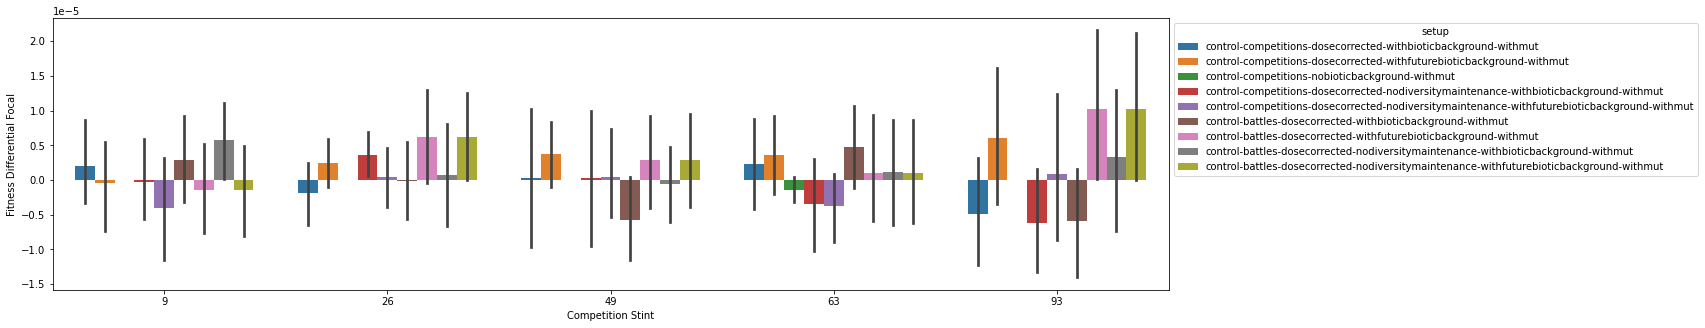

In [6]:
def barplot(*args, **kwargs):
    ax = sns.barplot(
        *args,
        **kwargs,
    )
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.gcf().set_size_inches(20, 5)


tp.tee(
    barplot,
    data=df[df['Root ID'] == 1],
    x='Competition Stint',
    y='Fitness Differential Focal',
    hue='setup',
    ci=95,    
)    
    

teeplots/hue=setup+viz=boxplot+x=competition-stint+y=focal-prevalence+ext=.pdf
teeplots/hue=setup+viz=boxplot+x=competition-stint+y=focal-prevalence+ext=.png


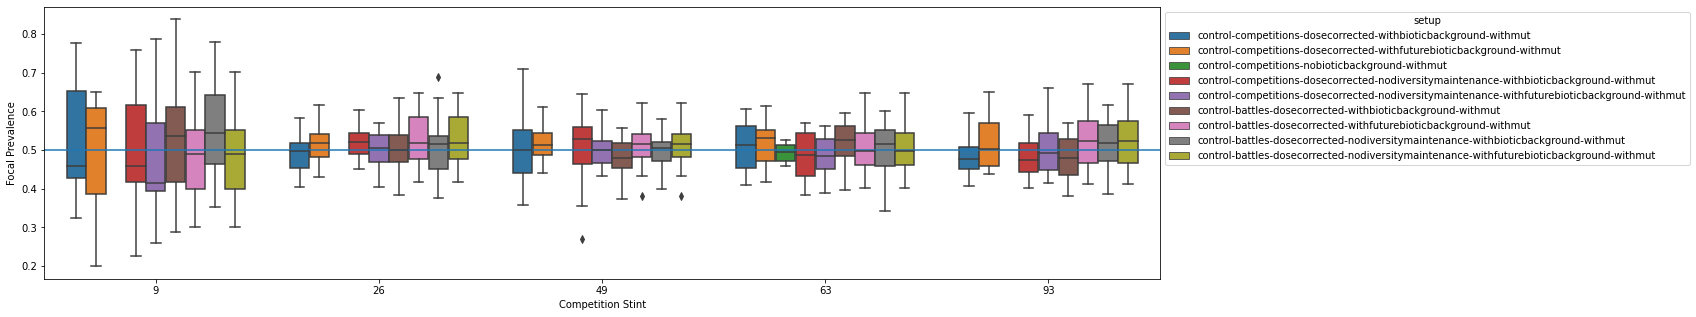

In [7]:
def boxplot(*args, **kwargs):
    ax = sns.boxplot(
        *args,
        **kwargs,
    )
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.axhline(0.5)
    plt.gcf().set_size_inches(20, 5)

tp.tee(
    boxplot,
    data=df[df['Root ID'] == 1],
    x='Competition Stint',
    y='Focal Prevalence',
    hue='setup',
)


teeplots/hue=setup+viz=countplot+x=competition-stint+ext=.pdf
teeplots/hue=setup+viz=countplot+x=competition-stint+ext=.png


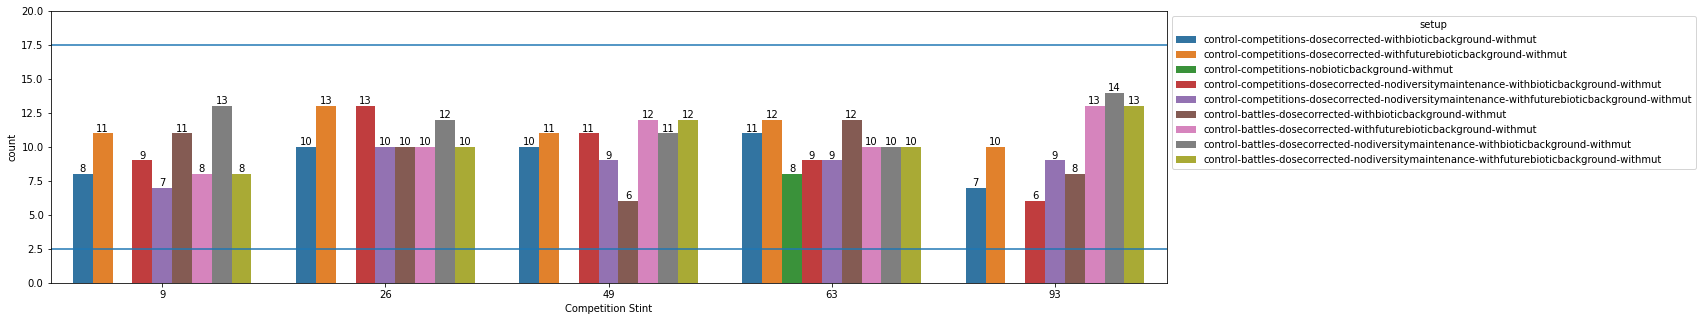

In [8]:
def countplot(*args, **kwargs):
    ax = sns.countplot(
        *args,
        **kwargs,
    )
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.axhline(2.5)
    plt.axhline(17.5)
    plt.gcf().set_size_inches(20, 5)
    ax.set_ylim(0,20)

    for item in ax.containers:
        ax.bar_label(item)

    # remove labels put on missing bars
    for text in ax.texts:
        if text.get_text() == '0':
            text.set_text('')
    
tp.tee(
    countplot,
    data=df[
        (df['Root ID'] == 1)
        & df['Positive Fitness Differential Focal']
    ],
    x="Competition Stint",
    hue="setup",
)
